# Decision Tree Regressor

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, root_mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [4]:
df = pd.read_csv('../Datasets/Housing.csv')
y = df['price']
X = df.drop('price', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)

In [8]:
ohe = OneHotEncoder(sparse_output=False, drop='first').set_output(transform='pandas')
trf = make_column_transformer((ohe, make_column_selector(dtype_include=object)), remainder='passthrough', verbose_feature_names_out=False).set_output(transform='pandas')
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)


In [11]:
dtr = DecisionTreeRegressor(random_state=25, max_depth=2)
dtr.fit(X_train_trf, y_train)
y_pred = dtr.predict(X_test_trf)
print(r2_score(y_test, y_pred), root_mean_squared_error(y_test, y_pred))

0.3865878044059061 21426.033419995056


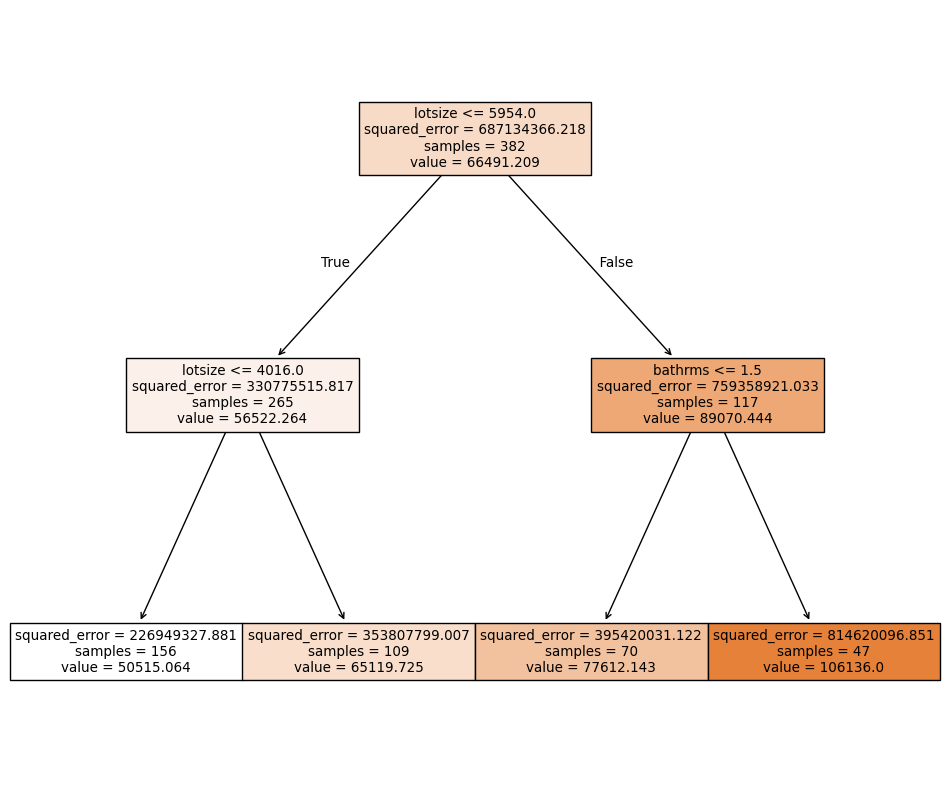

In [15]:
plt.figure(figsize=(12, 10))
plot_tree(dtr, filled=True, feature_names=X_train_trf.columns)
plt.show()

#### doing in loooooop

In [27]:
from tqdm import tqdm

depths = [None,2 ,3, 4, 5, 6, 7, 8]
splits = [2, 5, 10, 20, 50, 100, 200]
leaves = [1, 5, 10, 20, 50, 100, 200]
scores = []
for d in tqdm(depths):
    for l in leaves:
        for s in splits:
            dtc = DecisionTreeRegressor(random_state=25, max_depth=d, min_samples_split=s, min_samples_leaf=l)
            dtc.fit(X_train_trf, y_train)
            y_pred = dtc.predict(X_test_trf)
            scores.append([d, l, s, r2_score(y_test, y_pred)])

scores = pd.DataFrame(scores, columns=['depth', 'leaf','splits','score'])
scores.sort_values('score', ascending=False)

100%|██████████| 8/8 [00:01<00:00,  5.42it/s]


,depth,leaf,splits,score
346,8.0,1,20,0.520188
353,8.0,5,20,0.517948
3,NaN,1,20,0.516177
199,5.0,1,20,0.514985
248,6.0,1,20,0.514225
...,...,...,...,...
387,8.0,200,10,-0.039368
388,8.0,200,20,-0.039368
389,8.0,200,50,-0.039368
390,8.0,200,100,-0.039368


In [28]:
best_tree = DecisionTreeRegressor(random_state=25, max_depth=8, min_samples_leaf=1, min_samples_split=20)
best_tree.fit(X_train_trf, y_train)
df_imp = pd.DataFrame({'features':X_train_trf.columns,'importance':best_tree.feature_importances_})
df_imp.sort_values('importance', ascending=False)

,features,importance
6,lotsize,0.569796
8,bathrms,0.219284
9,stories,0.042706
5,prefarea_yes,0.033978
3,gashw_yes,0.032746
10,garagepl,0.030994
2,fullbase_yes,0.022467
7,bedrooms,0.021059
4,airco_yes,0.018979
0,driveway_yes,0.004319


#### Feature Importances plot

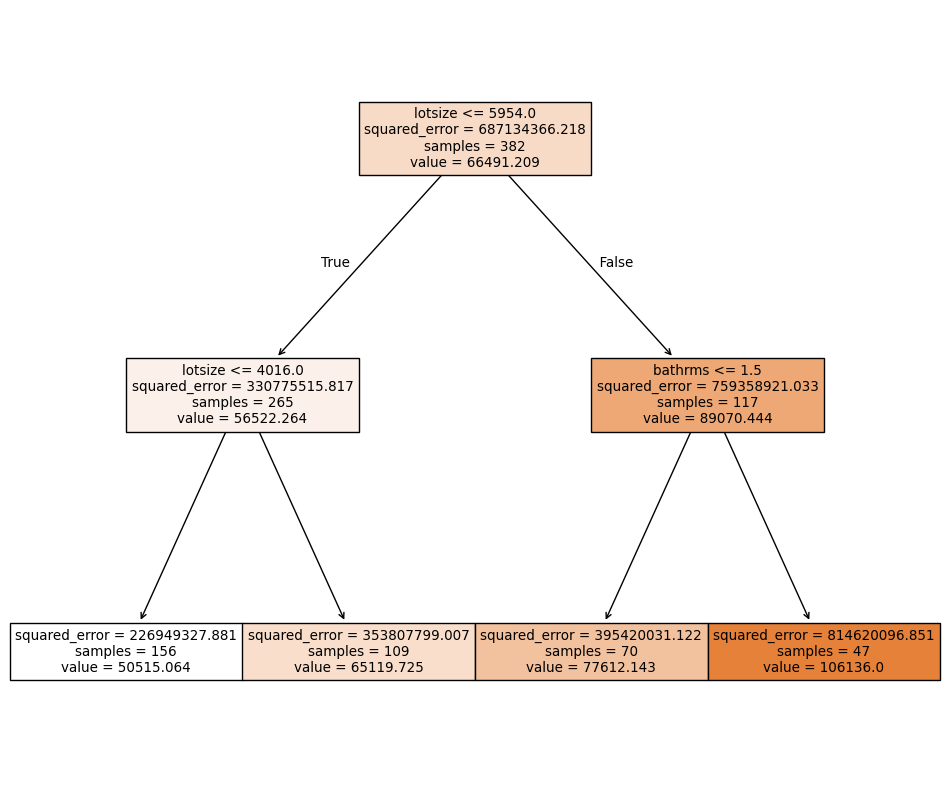

In [30]:
plt.figure(figsize=(12, 10))
plot_tree(dtr, feature_names=X_train_trf.columns, filled=True)
plt.show()

In [37]:
y_train.mean()

np.float64(66491.20942408378)

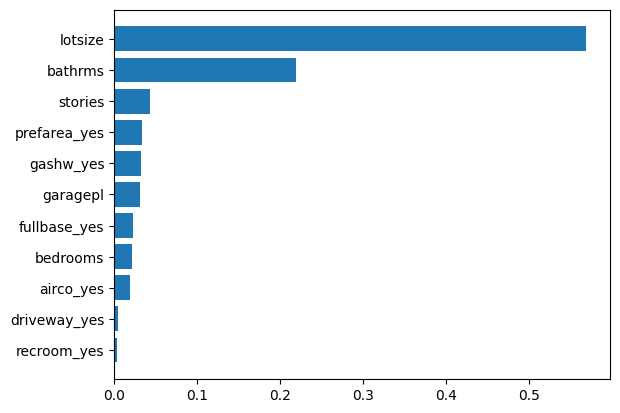

In [36]:
df_imp = df_imp.sort_values(by='importance', ascending=True)
plt.barh(df_imp['features'], df_imp['importance'])
plt.show()

# NEW DATASET: CONCRETE

In [39]:
from sklearn.preprocessing import StandardScaler
concrete = pd.read_csv('../Datasets/cases/Concrete_Strength/Concrete_Data.csv')
X = concrete.drop('Strength', axis=1)
y = concrete['Strength']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)

std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

In [52]:
from tqdm import tqdm

depths = [None,2 ,3, 4, 5, 6, 7, 8]
splits = [2, 5, 10, 20, 50, 100, 200]
leaves = [1, 5, 10, 20, 50, 100, 200]
scores = []

for d in tqdm(depths):
    for s in splits:
        for l in leaves:
            dtr = DecisionTreeRegressor(random_state=25, max_depth=d, min_samples_leaf=l, min_samples_split=s)
            dtr.fit(X_train_std, y_train)
            y_pred = dtr.predict(X_test_std)
            scores.append([d,s,l,r2_score(y_test, y_pred)])

scores = pd.DataFrame(scores, columns=['depth', 'splits', 'leaves', 'r2score'])
scores.sort_values('r2score', ascending=True)

100%|██████████| 8/8 [00:01<00:00,  6.27it/s]


,depth,splits,leaves,r2score
391,8.0,200,200,0.362037
34,NaN,50,200,0.362037
48,NaN,200,200,0.362037
41,NaN,100,200,0.362037
55,2.0,2,200,0.362037
...,...,...,...,...
301,7.0,5,1,0.795300
350,8.0,5,1,0.795461
14,NaN,10,1,0.803606
7,NaN,5,1,0.809676


In [54]:
best_tree =  DecisionTreeRegressor(random_state=25, max_depth=None, min_samples_leaf=1, min_samples_split=2)
best_tree.fit(X_train_std, y_train)

best_tree_df = pd.DataFrame({
    'Features':X_train.columns,
    'Importance':best_tree.feature_importances_
})

best_tree_df = best_tree_df.sort_values('Importance', ascending=True)

In [55]:
# plt.figure(figsize=(12,8))
# tqdm(plot_tree(best_tree, filled=True, feature_names=X_train.columns))
# plt.show()

<BarContainer object of 8 artists>

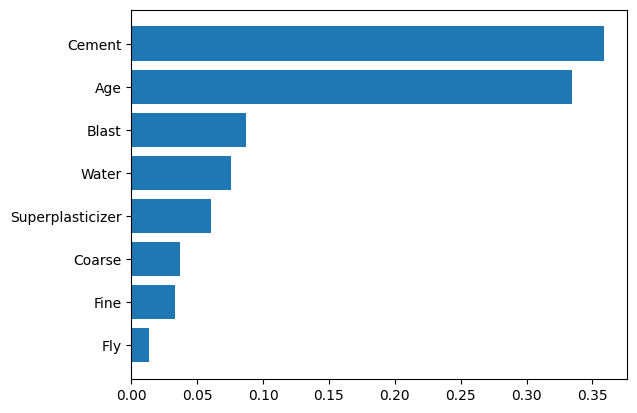

In [56]:
plt.barh(best_tree_df['Features'], best_tree_df['Importance'])